In [4]:
#import required libraries
import pandas as pd
import numpy as np

#Data visualization
import seaborn as sns  
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
df1 = pd.read_excel(r"..\Sterling\Sterling_E-Commerce_Data.xlsx")
df1.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,2013-09-15,2022-08-18,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,2013-09-15,2022-08-20,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

In [10]:
df1.describe()

,Cust Id,Customer Since,Date of Order,Item Id,Order Id,Ref Num,Zip,Qty Ordered,Total
count,283083.000000,283083,283083,283083.000000,2.830780e+05,283083.000000,283083.000000,283083.000000,283083.000000
mean,70106.816026,2007-10-11 22:23:18.552368384,2022-03-12 12:24:32.794904832,741747.110628,1.004570e+08,561107.885991,49147.171374,3.008224,816.230712
min,4.000000,1978-11-04 00:00:00,2021-10-01 00:00:00,574769.000000,1.003547e+08,111127.000000,210.000000,1.000000,0.000000
25%,56640.000000,2002-08-24 00:00:00,2021-12-24 00:00:00,659898.500000,1.004047e+08,341071.000000,26264.000000,2.000000,49.900000
50%,74320.000000,2010-03-22 00:00:00,2022-03-16 00:00:00,742471.000000,1.004518e+08,565623.000000,48808.000000,2.000000,149.800000
75%,92371.000000,2015-01-05 00:00:00,2022-05-18 00:00:00,826078.500000,1.005134e+08,782211.000000,72004.000000,3.000000,800.000000
max,115326.000000,2017-07-28 00:00:00,2022-09-30 00:00:00,905208.000000,1.005624e+08,999981.000000,99402.000000,501.000000,101262.590000
std,30215.394879,NaN,NaN,95664.609013,6.090992e+04,256101.205409,27235.561738,4.565168,1986.164932


In [12]:
#identifying missing features
df1.isna().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [14]:
df1.dropna(inplace=True)

In [15]:
df1.isnull().sum()


Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          0
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [16]:
#identifying duplicated data points
df1.duplicated().sum()

0

In [17]:
# convert to Customer Since into a pandas data time object
df1["Customer Since"]=pd.to_datetime(df1["Customer Since"])

# extract the year, month, quater
df1["year"]=df1["Customer Since"].dt.year
df1["month"]=df1["Customer Since"].dt.month
df1["quarter"]=df1["Customer Since"].dt.quarter

df1.head(2)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total,year,month,quarter
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,352808,Midwest,IA,mcrenaud,50519,3,32.0,2008,2,1
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,310849,Midwest,IL,mgshimp,62223,2,74.8,2005,6,2


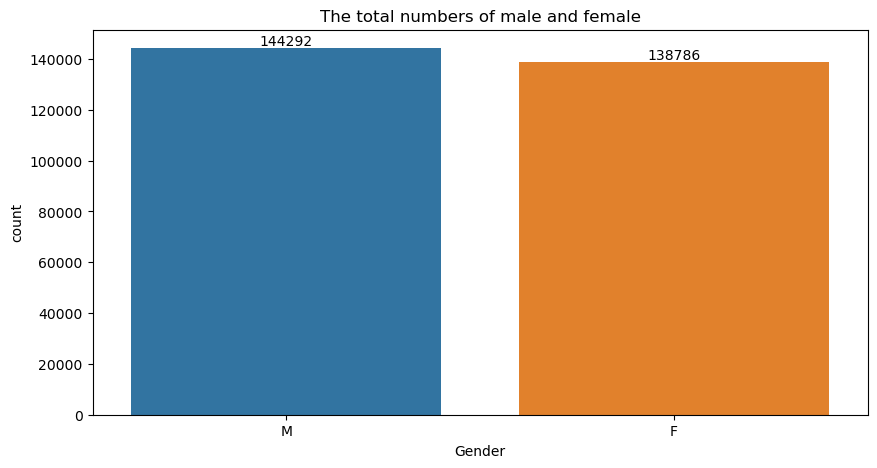

In [23]:
# The highest gender among customers
plt.figure(figsize=(10,5))
ax= sns.countplot(x=df1["Gender"], order=df1["Gender"].value_counts(ascending=False).index)
values=df1["Gender"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("The total numbers of male and female");

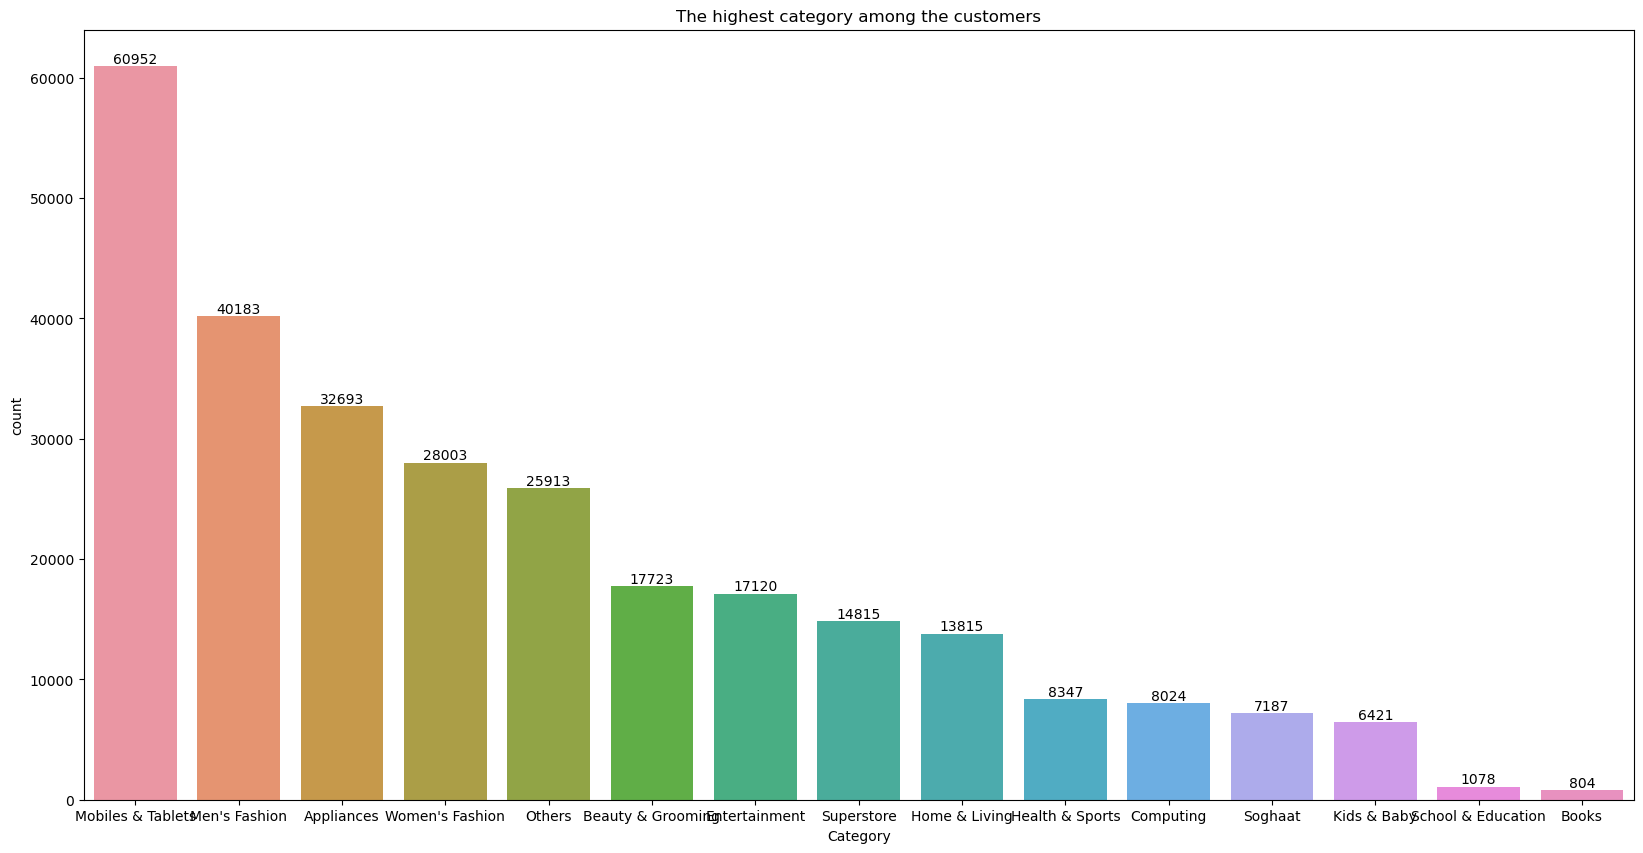

In [22]:
# The highest category among the customers
plt.figure(figsize=(20,10))
ax= sns.countplot(x=df1["Category"], order=df1["Category"].value_counts(ascending=False).index)
values=df1["Category"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("The highest category among the customers");

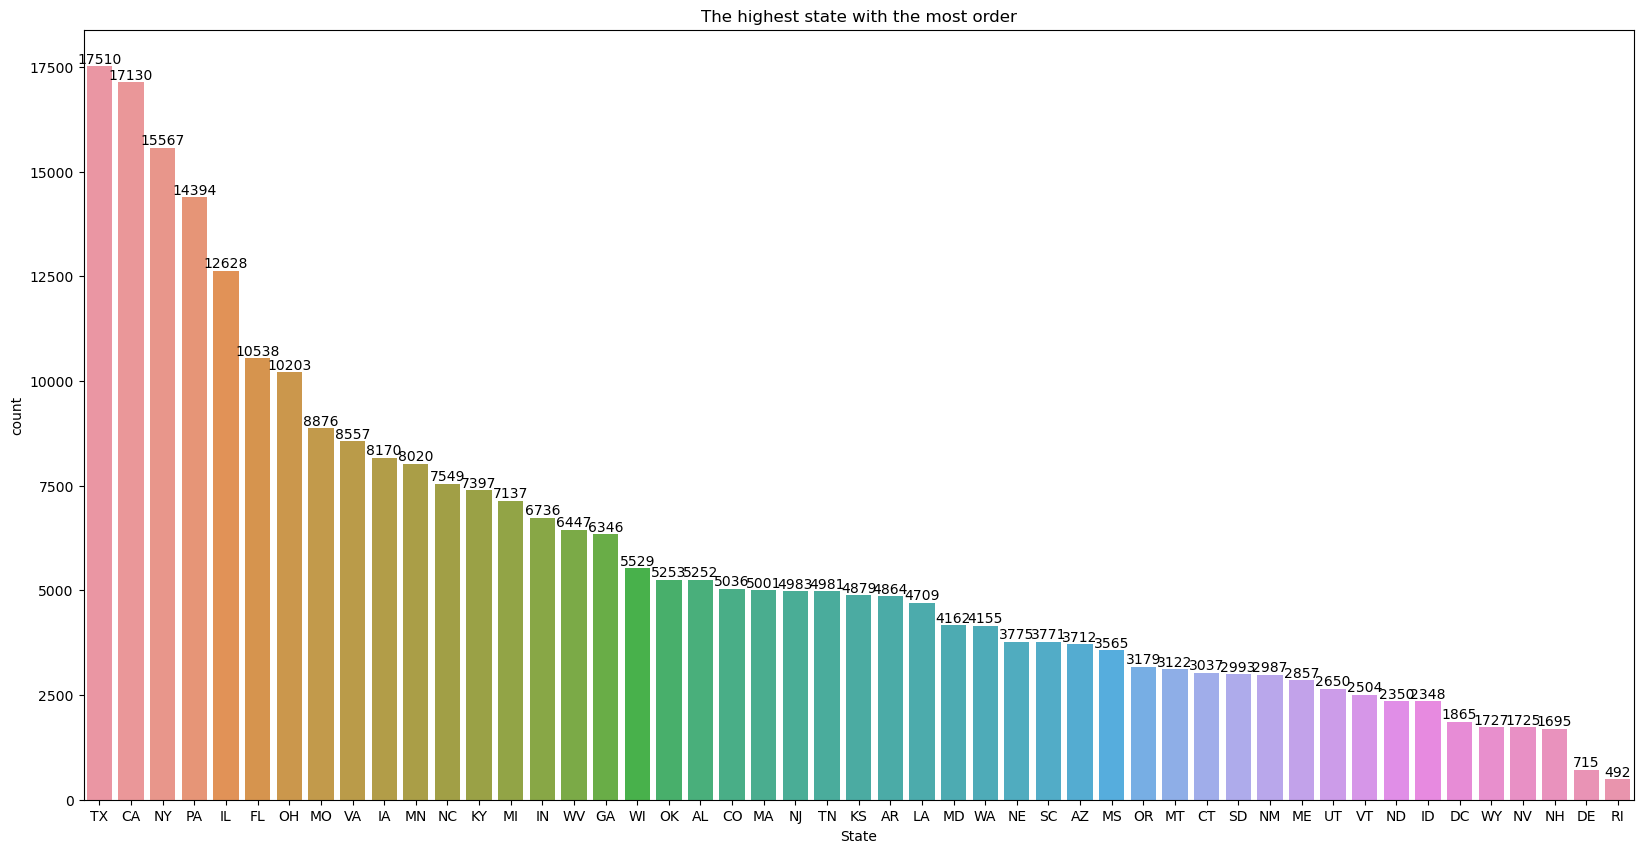

In [24]:

# The highest state with the most order
plt.figure(figsize=(20,10))
ax= sns.countplot(x=df1["State"], order=df1["State"].value_counts(ascending=False).index)
values=df1["State"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("The highest state with the most order");

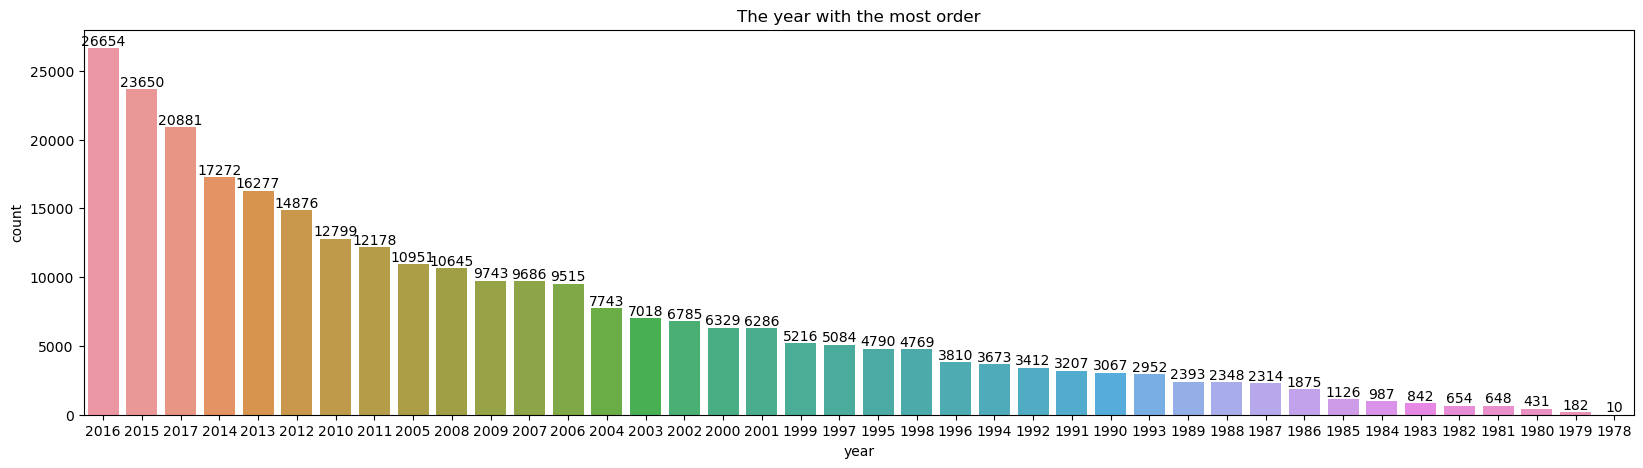

In [26]:
plt.figure(figsize=(20,5))
ax= sns.countplot(x=df1["year"], order=df1["year"].value_counts(ascending=False).index)
values=df1["year"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("The year with the most order");

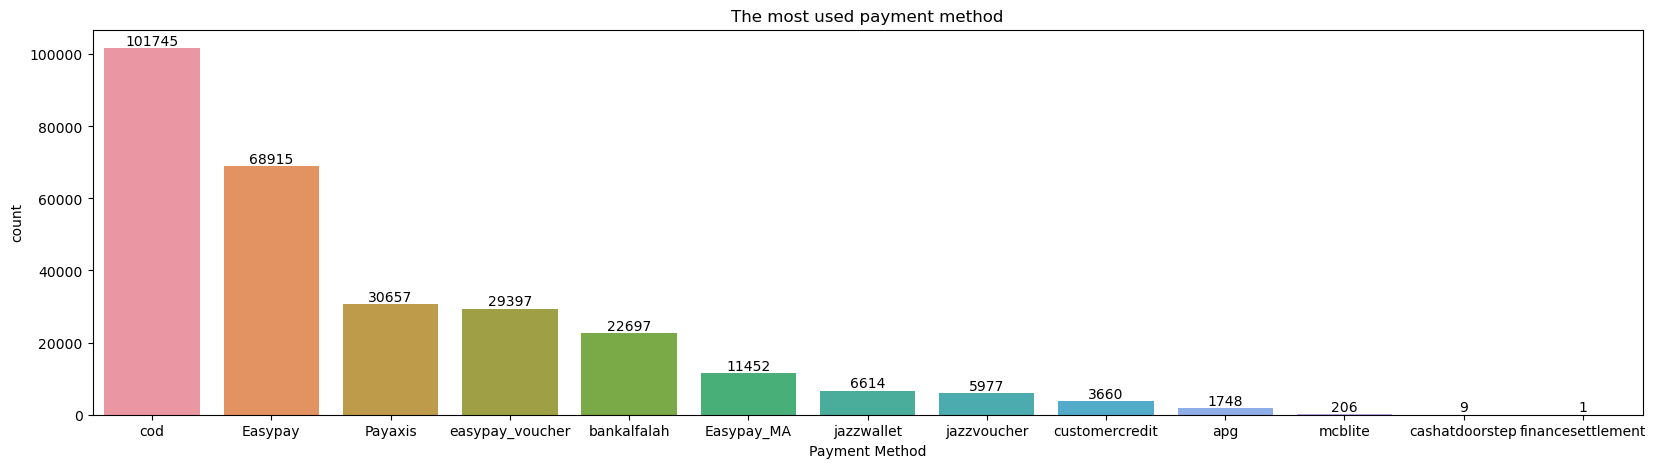

In [27]:
plt.figure(figsize=(20,5))
ax= sns.countplot(x=df1["Payment Method"], order=df1["Payment Method"].value_counts(ascending=False).index)
values=df1["Payment Method"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("The most used payment method");

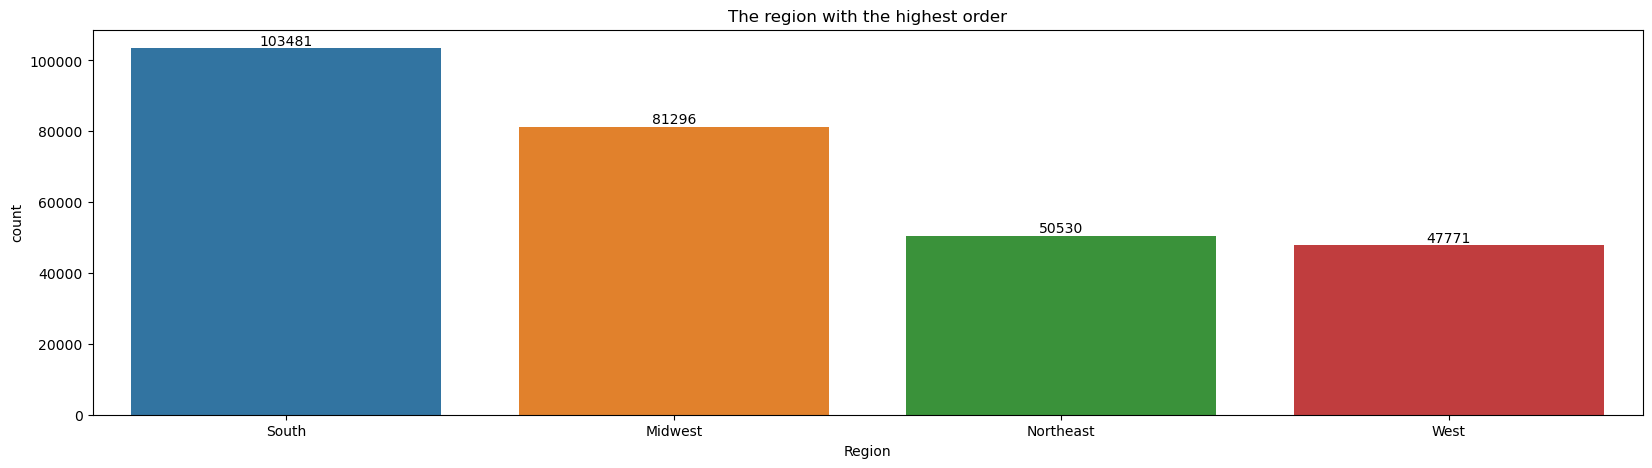

In [28]:
plt.figure(figsize=(20,5))
ax= sns.countplot(x=df1["Region"], order=df1["Region"].value_counts(ascending=False).index)
values=df1["Region"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("The region with the highest order");

In [29]:
# convert to Date of Order into a pandas data time object
df1["Date of Order"]=pd.to_datetime(df1["Date of Order"])

# extract the year, month, quater
df1["year"]=df1["Date of Order"].dt.year
df1["month"]=df1["Date of Order"].dt.month
df1["quarter"]=df1["Date of Order"].dt.quarter

df1.head(2)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total,year,month,quarter
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,352808,Midwest,IA,mcrenaud,50519,3,32.0,2022,8,3
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,310849,Midwest,IL,mgshimp,62223,2,74.8,2022,8,3


In [30]:
#grouping our data by the customer id
cust_data = df1.groupby("Cust Id")


In [33]:
# calculate the total sales, order_count, and the average order value per customer
totalSales = cust_data["Total"].sum()
order_count = cust_data["Date of Order"].size()
avg_order_value = totalSales / order_count

df2 = pd.DataFrame({
    "TotalSales":totalSales,
    "OrderCount":order_count,
    "AvgOrdVal":avg_order_value
});

In [34]:
df2.head(2)

,TotalSales,OrderCount,AvgOrdVal
Cust Id,,,
4,27394.19,41,668.150976
15,216.80,6,36.133333


In [37]:
#visualize the total sales feature
# plt.figure(figsize=(5,2))
# g = sns.boxplot(df1=df2, x='TotalSales');
# plt.title("total sales")
# plt.show()

# sns.histplot(df2.TotalSales,bins=100);

In [38]:
#normalize data
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df2),index = df2.index, columns=df2.columns)
scaled_df


,TotalSales,OrderCount,AvgOrdVal
Cust Id,,,
4,0.014416,0.015854,0.015958
15,0.000114,0.001982,0.000863
16,0.006246,0.007531,0.014174
20,0.015113,0.003964,0.062358
21,0.000055,0.000000,0.002508
...,...,...,...
115322,0.000110,0.000396,0.002503
115323,0.002326,0.000000,0.105567
115324,0.000021,0.000000,0.000953
